In [1]:
import numpy as np
import torch 
from collections import OrderedDict
import os

from utils.sample_parameters import ParamSamples
from utils.train_n_test import TrainTest
from utils.custom_loss import revenue_loss

from models.CNN_1D_vanilla import CNN_1D

In [2]:
params_dict = {
    # HYPERMARAMETER RANGES
    'BATCH_SIZE': ([64, 128, 256, 512], None),
    'EPOCHS': ([20, 40, 50], None),
    'OPTIMIZER': ([torch.optim.RMSprop, torch.optim.Adam], None),
    'LEARNING_RATE': ([1e-5, 5e-5, 1e-4, 5e-4, 1e-3], None),
    'LOSS': ([revenue_loss()], None),
    'EARLY_STOPPING': ([True], None),
    'PATIENCE': (list(range(0,3)), None),
    'MIN_DELTA': ([1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4], None), 

    # NETWORK PARAMETER RANGES
    'HIDDEN_DEPTH': (np.arange(2, 5), None),
    'HIDDEN_SIZES': ([64, 128, 256, 512], 
                       {'max_depth': 'HIDDEN_DEPTH', # sample a list of maximum HIDDEN_DEPTH length 
                        'consecutive': 1}), # list must be increasing 
    'KERNEL_SIZES': ([3,5,7,9], 
                        {'max_depth': 'HIDDEN_DEPTH', 
                        'monotonic': -1}),  
    'MAXPOOL': ([2], None),
    'FC_DEPTH':  (np.arange(1,3), None),
    'FC_SIZES': ([256, 512], 
                    {'max_depth': 'FC_DEPTH',
                    'consecutive': -1}),
    'DROPOUT': (np.arange(8)/10, None)
}

In [3]:
fixed_params = [{'BATCH_SIZE': 256,
  'EPOCHS': 20,
  'OPTIMIZER': torch.optim.RMSprop,
  'LEARNING_RATE': 0.0001,
  'LOSS': torch.nn.MSELoss(), #torch.nn.MSELoss()
  'EARLY_STOPPING': True,
  'PATIENCE': 1,
  'MIN_DELTA': 1e-06,
  'HIDDEN_DEPTH': 4,
  'HIDDEN_SIZES': np.array([64,128, 256, 512]),
  'KERNEL_SIZES': np.array([9, 7, 5, 3]),
  'MAXPOOL': 2,
  'FC_DEPTH': 2,
  'FC_SIZES': np.array([512]),
  'DROPOUT': 0.2}]

In [4]:
N = 3
FIX = True

CSV_NAMES = [i for i in os.listdir('data/tensors') if 'expt' in i ]
CSV_NAMES = [i for i in CSV_NAMES if 'expt0' not in i ]
CSV_NAMES = [i for i in CSV_NAMES if 'persistence' not in i ]

#PKL_NAMES = [i for i in os.listdir('data/tensors') if 'expt0' in i ]
#PKL_NAMES = [i for i in PKL_NAMES if 'persistence' not in i ]

In [5]:
#CSV_NAMES = ['expt0_mean_speeds_mean_dirs_1dtime_original_interpolation.pkl']

In [ ]:
for pkl in CSV_NAMES: # PKL_NAMES 
    PKL_NAME = pkl[:-4]
    print(PKL_NAME)
    train, val, test = torch.load('data/tensors/'+ PKL_NAME + '.pkl')
    persistence = torch.load('data/tensors/'+ PKL_NAME + '_persistence.pkl')
    
    torch.nn.MSELoss()(persistence, test[1])
    
    if FIX: 
        param_samples = fixed_params * N        
    else: 
        params = ParamSamples(OrderedDict(params_dict))
        param_samples = params.SampleAll(N)

    stats = []
    for i in np.arange(N): 
        print(param_samples[i])
        run = TrainTest(CNN_1D, (train, val, test), param_samples[i], class_size=1)
        run.train()
        run.test()
        stats.append(run.stats)
    
    for i in np.arange(N):
        for key,val in stats[i].items():
            param_samples[i][key] = val

    torch.save(param_samples, 'results/CNN1D_experiment_N'+str(N)+'_'+PKL_NAME+'.pkl')

expt10


  0%|          | 0/96 [00:00<?, ?it/s]

{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.019328530877828598, valid_loss: 0.04093233868479729


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009700950235128403, valid_loss: 0.02963401935994625


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008255809545516968, valid_loss: 0.029203960672020912


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.007432269863784313, valid_loss: 0.025067610666155815


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006608509924262762, valid_loss: 0.02463442087173462


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006128729786723852, valid_loss: 0.02234731987118721


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.00573382992297411, valid_loss: 0.0242267195135355


100%|██████████| 12/12 [00:01<00:00,  7.13it/s]


Early stopped at Epoch:  7


  0%|          | 0/96 [00:00<?, ?it/s]

train_time: 290.2586040496826
test_loss: tensor(0.0211)
revenue: 48.83351160058197
{'BATCH_SIZE': 256, 'EPOCHS': 20, 'OPTIMIZER': <class 'torch.optim.rmsprop.RMSprop'>, 'LEARNING_RATE': 0.0001, 'LOSS': MSELoss(), 'EARLY_STOPPING': True, 'PATIENCE': 1, 'MIN_DELTA': 1e-06, 'HIDDEN_DEPTH': 4, 'HIDDEN_SIZES': array([ 64, 128, 256, 512]), 'KERNEL_SIZES': array([9, 7, 5, 3]), 'MAXPOOL': 2, 'FC_DEPTH': 2, 'FC_SIZES': array([512]), 'DROPOUT': 0.2}


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 0, train_loss: 0.01826798915863037, valid_loss: 0.03831079974770546


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 1, train_loss: 0.009817570447921753, valid_loss: 0.03465329855680466


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 2, train_loss: 0.008412390016019344, valid_loss: 0.02944082021713257


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 3, train_loss: 0.0072957598604261875, valid_loss: 0.02724328078329563


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 4, train_loss: 0.006576030049473047, valid_loss: 0.026769330725073814


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 5, train_loss: 0.006008279975503683, valid_loss: 0.024984780699014664


  0%|          | 0/96 [00:00<?, ?it/s]

decrease in val loss < min_delta, patience count:  1
Epoch: 6, train_loss: 0.005498200189322233, valid_loss: 0.025180179625749588


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch: 7, train_loss: 0.005112620070576668, valid_loss: 0.02349488064646721


 81%|████████▏ | 78/96 [00:23<00:05,  3.16it/s]

In [14]:
run.stats

{'epoch_stopped': 10,
 'train_time': 323.12972831726074,
 'test_loss': tensor(0.0211),
 'mean_train_loss': [0.01912877,
  0.010387427,
  0.00882573,
  0.007762479,
  0.0070186965,
  0.006366816,
  0.005889687,
  0.0053597637,
  0.005031266,
  0.004693516,
  0.0043262797],
 'mean_val_loss': [0.041668233,
  0.034134444,
  0.029737594,
  0.027743109,
  0.023352785,
  0.029153673,
  0.021674782,
  0.022888115,
  0.020701991,
  0.021467894],
 'min_val_loss': 0.020701991,
 'predictions': tensor([-0.2542, -0.2095, -0.1421,  ..., -0.0673, -0.0109,  0.0257]),
 'bal_list': array([1.00000000e+07, 9.98116762e+06, 9.95344743e+06, ...,
        4.90365176e+08, 4.90571619e+08, 4.90767154e+08])}

In [7]:
run.stats

{'epoch_stopped': 6,
 'train_time': 214.28383207321167,
 'test_loss': tensor(0.1089),
 'mean_train_loss': [0.09720957,
  0.07204077,
  0.06647175,
  0.062709935,
  0.060061824,
  0.057615217,
  0.055906724],
 'mean_val_loss': [0.15372148,
  0.13582963,
  0.13056141,
  0.12664635,
  0.12572424,
  0.12849419],
 'min_val_loss': 0.12572424,
 'predictions': tensor([-0.1878, -0.1711, -0.1401,  ..., -0.1392, -0.0777, -0.0132]),
 'bal_list': array([1.00000000e+07, 9.92341993e+06, 9.86224584e+06, ...,
        4.81528818e+08, 4.81672757e+08, 4.81810137e+08])}

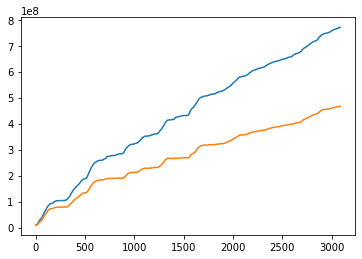

In [9]:
# plotting against persistence and perfect prediction
from utils.custom_loss import Balance
import matplotlib.pyplot as plt
perfect_bal = Balance(1e7, 10, 100, (0,87000), 'minmax')
perfect_bal.update(test[1], test[1], test[0][:,-1,1])

plt.plot(perfect_bal.balance_list)
plt.plot(run.stats['bal_list'])

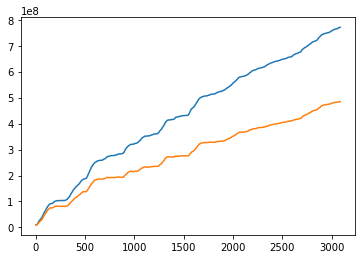

In [12]:
# plotting against persistence and perfect prediction
from utils.custom_loss import Balance
import matplotlib.pyplot as plt
perfect_bal = Balance(1e7, 10, 100, (0,87000), 'minmax')
perfect_bal.update(test[1], test[1], test[0][:,-1,1])

plt.plot(perfect_bal.balance_list)
plt.plot(run.stats['bal_list'])

np.array([0.0285, 0.0187, 0.0214, 0.0226, 0.0181, 0.0225])
PATIENCE = 2
tensor(0.0195), 1.9e9
tensor(0.0174), 0.2e9

2 layers
tensor(0.0184), 1.3e9 
tensor(0.0188), 0.2e9

0

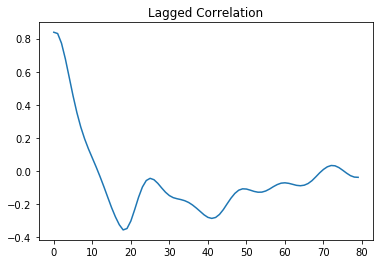

In [24]:
# # Visualise Lagged Correlation

from utils.visuals import lagged_correlation# calculate lag
corr = lagged_correlation(stats[0]['predictions'], test[1], plot=True)
np.amax(corr) 
np.argmax(corr)   

<IPython.core.display.Javascript object>


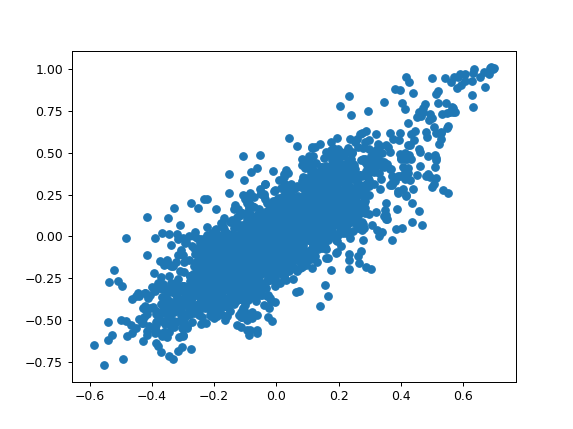

In [21]:
# plt.scatter(stats[0]['predictions'], test[1])

In [26]:
from utils.visuals import SliceGenerator
sg = SliceGenerator(run.model, test[0], test[1])

<IPython.core.display.Javascript object>


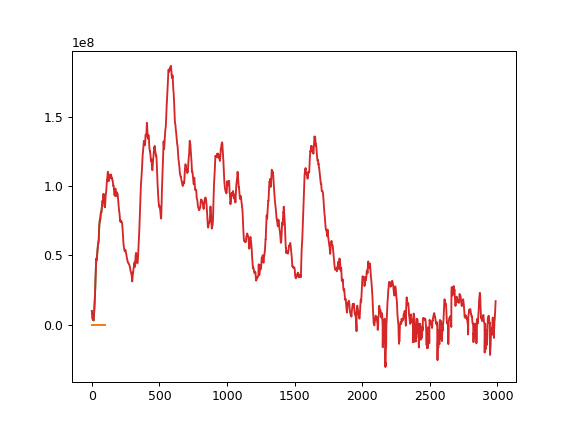

In [42]:
sg.right()

<IPython.core.display.Javascript object>


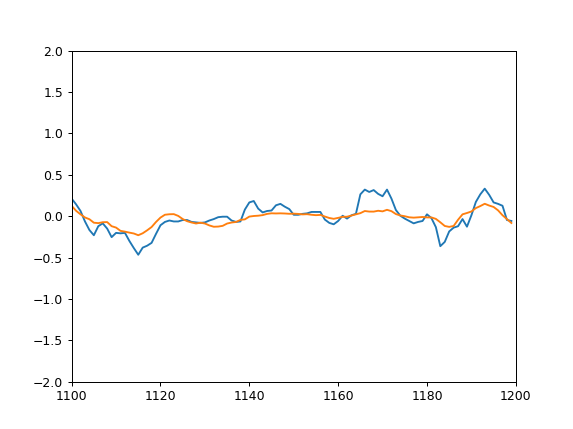

In [13]:
# # # Can't find a way to make this a function (plot not showing), so putting this in every notebook 
from matplotlib.animation import FuncAnimation, PillowWriter 
%matplotlib notebook

interval = 50
windowsize = 100
test_ = test[1]
pred = stats[0]['predictions']

fig  = plt.figure()
ax   = plt.axes(xlim=(0, windowsize), ylim=(-2, 2))
ln1, = plt.plot([],[])
ln2, = plt.plot([],[])

def update_animation(f):
    r = np.arange(f, f + windowsize)
    lim = ax.set_xlim(f, f+ windowsize)
    ln1.set_data(r, test_[r])
    ln2.set_data(r, pred[r])

frames = np.arange(0, len(pred)-windowsize, interval)
ani = FuncAnimation(fig, update_animation, frames=frames) 
plt.show()
#ani.save('results/gif/'+PKL_NAME+'.gif', writer='imagemagick', fps=50)